# Figures for Test 4

### Test 4: Effective radius

#### Version 7a: 2024-08-07

* This version include logscale colorbar with SymLogNorm
* Ice Optical Schemes (index associated with config file):
        5.1 Fu 1996 and Fu, Yang & Sun 1998 (Fu: 1O).
        5.2 Yi et al. 2013 (Yi13: 2O).
        5.3 Baran et al. 2016 (Baran16: 3O).
        5.4 Baran et al. 2014 (Baran14: 4O).

### Loading Libraries

In [1]:
import numpy as np # Version used here: 1.23.4 (python 3.8.15)
import pandas as pd # Version used here: 1.5.2 (python 3.8.15)
import xarray as xr # Version used here: 2022.11.0 (python 3.8.15)
from scipy import interpolate # Version used here: 1.10.0 (python 3.8.15)

import matplotlib.pyplot as plt # Version used here: 3.6.2 (python 3.8.15)
import matplotlib.colors as colors

# Project utilities
from project_utilites import crh_diff, crh_rdiff, colorbar_range, cloud_range, cloud_range_3levels

%matplotlib notebook

In [2]:
test    = 'test4'
version = 'v7a'

## Reading data

In [3]:
re = np.arange(0.1, 100.1, 0.1)

In [4]:
ecrad_ref_data_236 = xr.open_dataset('2-ecrad_outputs/output_1Dset_' + test + '_236_1O_' + version + '.nc')
crh_data = xr.open_dataset('3-crh_matrices/CRH_1Dset_' + test + '_' + version + '.nc')

# Smaller sizes result in overestimate lw_up in Fu. K_ext^LW decreases considerable below 10um
# Yi doesn't cover radius bigger than 60 um.
# Size range is reduced from 10 um to 60 um:

lim_i = np.where(re == min(re, key = lambda x: abs(x - 10)))[0][0]
lim_f = np.where(re == min(re, key = lambda x: abs(x - 60)))[0][0]
crh_data = crh_data.sel(variable = slice(lim_i, lim_f+1))

crh_sw   = crh_data.crh_sw.values
crh_lw   = crh_data.crh_lw.values
crh_net  = crh_data.crh_net.values

In [5]:
tropical_profile = pd.read_csv('tropical_profile_ellingson_250m.txt', sep='\s+ ', engine = 'python')

In [6]:
temp_int       = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                      tropical_profile['temperature (K)'].iloc[::-1])
# Temperature and pressure profiles are the same for each cloud layer:
temperature_hl = temp_int(ecrad_ref_data_236.pressure_hl.values)

altitude_int   = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                      tropical_profile['height (km)'].iloc[::-1])
altitude_hl    = altitude_int(ecrad_ref_data_236.pressure_hl.values)

In [7]:
temp            = pd.Series(temperature_hl[0])
tropopause_i    = temp.argmin()
upper_limit_i   = (temp.iloc[tropopause_i:] - 201).abs().argmin()
lower_limit_i   = (temp.iloc[tropopause_i:] - 236).abs().argmin()
temp_range      = temp.iloc[tropopause_i+upper_limit_i:tropopause_i+lower_limit_i+1]
melting_layer_i = (temp - 273.15).abs().argmin()
melting_layer   = temp.iloc[melting_layer_i]
tropopause      = temp.min()

altitude_hl_pd  = pd.Series(altitude_hl[0])

## Figure S14. CRHs:

In [27]:
print(crh_sw.max())
print(crh_lw.max())
print(crh_net.max())
print(crh_sw.min())
print(crh_lw.min())
print(crh_net.min())

18.995848094200117
62.27186822356335
66.70381607804809
-0.7047810125889784
-20.048094314722054
-11.422362643885524


For SymLogNorm:

In [28]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_data, test, diff = False)

In [29]:
vmin, vmax, linthresh, linscale

(-70.0, 70.0, 1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [30]:
#vmin     = -150
#vmax     = 150
#linthresh = 1
linscale = 0.5

Max and min lines for each case:

In [31]:
datain_path  = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range_3levels(datain_path, test, version, crh_data, diff = False)

In [32]:
sw_ranges, lw_ranges, net_ranges

(array([[-0.70478101, 18.99584809],
        [-0.64328669, 15.78067752]]),
 array([[-20.04809431,  62.27186822],
        [-19.29909497,  60.42775211]]),
 array([[-10.57156665,  66.70381608],
        [-11.42236264,  64.49322425]]))

<IPython.core.display.Javascript object>


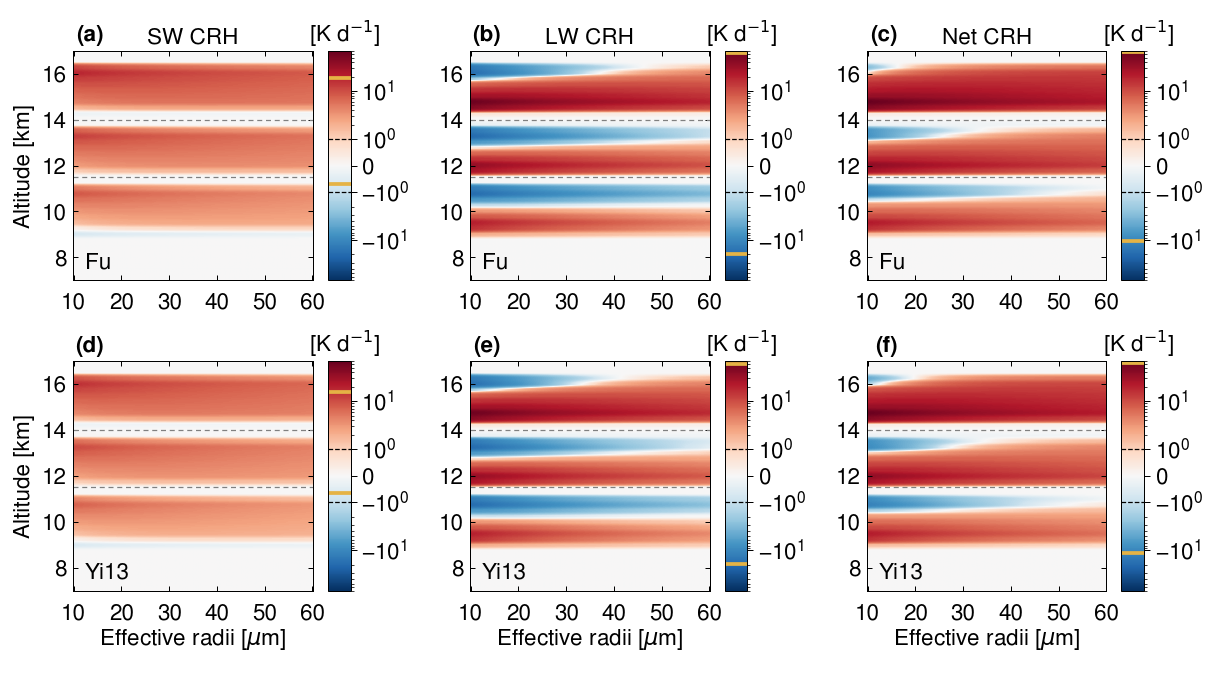

In [33]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 7.5 # inches
flength  = 13.5 # inches

rows    = 2
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.925, bottom = 0.125, left = 0.06, right = 0.96, 
                    hspace = .35, wspace = .325)

# Colorbar label position
labelpad     = -52
cb_label_pos = 1.14

#Sch_order = [0, 3, 1, 2] # Fu, Baran14, Yi13 and Baran16
for opt in range(rows):
#    sch = Sch_order[opt]
    coli = 0
    for comp in ['sw', 'lw', 'net']:
        im = ax[opt, coli].imshow(eval('crh_' + comp)[opt], 
                                  cmap = 'RdBu_r', aspect = 'auto',
                                  norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                           vmin = vmin, vmax = vmax)) 
        cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
        cbar.ax.axhline(eval(comp + '_ranges')[opt, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(eval(comp + '_ranges')[opt, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.set_label(r'[K d$^{-1}$]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
                       fontsize = fontsize, fontname = fontname)
        cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
        cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
        cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
        cbar.ax.tick_params(which = 'minor', length = 2.5)
        for tick in cbar.ax.get_yticklabels():
            tick.set_fontname(fontname)
        if opt == 0:
            if comp == 'net': frame_title = comp.capitalize()
            else: frame_title = comp.upper()
            ax[opt, coli].set_title(frame_title + ' CRH', color = 'black',
                                    fontsize = fontsize, fontname = fontname,
                                    y = 1)
        
        ax[opt, coli].axhline((altitude_hl_pd - 11.5).abs().argmin(),
                              dashes=[4, 3], color = 'grey', linewidth = 1)
        ax[opt, coli].axhline((altitude_hl_pd - 14).abs().argmin(),
                              dashes=[4, 3], color = 'grey', linewidth = 1)

        coli += 1

# AXIS PARAMETERS
# Y Axis: altitude tickLabels are rounded for visualization:
yticks      = np.arange(0, crh_net.shape[1] + 1, 8) # altitude tick labels
yticklabels = (altitude_hl_pd.loc[yticks].round(1)-.1).astype('int').to_list()
       
# X Axis: # Logscale ticklabels are built manually:
new_re = np.arange(10, 60.1, 0.1)
xticks = np.arange(1, len(new_re), int(len(new_re)/5))
xticks = np.append(xticks, 500)
xticklabels = new_re[xticks].round(0).astype('int')
    
OptSch          = ['Fu', 'Yi13']
panel_letters   = ['(a)','(b)','(c)','(d)','(e)','(f)']
panel_letters_i = 0
for opt in range(rows):
#    sch = Sch_order[opt]
    for j in range(columns):
        # Horizontal Lines:
        #h = ax[j,i].axhline(y = melting_layer_i, linestyle = 'dashed', color = 'grey',
        #                    dashes = (3, 2), linewidth  =2)
        #h = ax[j,i].axhline(y = tropopause_i, linestyle = 'dashed', color = 'grey',
        #                    dashes = (3, 2), linewidth  =2)
        if opt == 1:
            ax[opt, j].set_xlabel(r'Effective radii [$\mu$m]', 
                                  fontsize = fontsize, fontname = fontname,
                                  color ='black', labelpad = 2.5)
        ax[opt, j].tick_params(axis = 'x', which = 'major', color = 'black',
                               size = 4, direction = 'in', top = True,
                               labelsize = fontsize, pad = 10)
        for tick in ax[opt, j].get_xticklabels():
            tick.set_fontname(fontname)
        ax[opt, j].set_xticks(xticks)
        ax[opt, j].set_xticklabels(xticklabels) #[::-1]
        #ax[opt, j].set_xlim(1, 11) 
        
        ax[opt, j].tick_params(axis = 'y', which = 'major', color = 'black',
                               size = 4, direction = 'in', right = True,
                               labelsize = fontsize, pad = 5)
        for tick in ax[opt, j].get_yticklabels():
            tick.set_fontname(fontname)
        ax[opt, j].set_yticks(yticks)
        ax[opt, j].set_yticklabels(yticklabels)
        if j == 0:
            ax[opt, j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                                  color ='black', labelpad = 5)
        ax[opt, j].text(0.05, 0.03, OptSch[opt],
                        ha = 'left', va = 'bottom', transform = ax[opt, j].transAxes,
                        fontsize = fontsize, fontname = fontname, color = 'black')

        ax[opt, j].set_ylim((altitude_hl_pd - 7).abs().argmin(), (altitude_hl_pd - 17).abs().argmin())
        
        # Panel letters:
        ax[opt, j].text(0.13, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                        ha = 'right', va = 'top', transform = ax[opt, j].transAxes,
                        fontsize = fontsize, fontname = fontname, color = 'black')
        panel_letters_i += 1
        
# Save Figure:
#plt.savefig('paper_figures/fs14.pdf', dpi = 300)

## Figure 06. CRH interscheme difference for Test 4:

In [8]:
crh_diff_ds = crh_diff(crh_data, test)

In [9]:
# Shortwave CRH differences:
print('Shortwave CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_sw.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_sw.values[0].min())

print('')
# Longwave CRH differences:
print('Longwave CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_lw.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_lw.values[0].min())

print('')
# Net CRH differences:
print('Net CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_net.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_net.values[0].min())

Shortwave CRH Differences:
Yi - Fu max:  0.0724083916525311
Yi - Fu min:  -3.2151705731760156

Longwave CRH Differences:
Yi - Fu max:  1.2747909086923923
Yi - Fu min:  -3.004534379418331

Net CRH Differences:
Yi - Fu max:  0.07285459588669152
Yi - Fu min:  -3.636518467551472


For SymLogNorm (Only considering Fu scheme in this case):

In [10]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_diff_ds, test, diff = True)

In [11]:
vmin, vmax, linthresh, linscale

(-4.0, 4.0, 0.1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [12]:
# linthresh = .01
# linscale  = .1

Max and min lines for each case:

In [13]:
datain_path = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range_3levels(datain_path, test, version, crh_diff_ds, diff = True)

In [14]:
sw_ranges, lw_ranges, net_ranges

(array([[-3.21517057,  0.07240839],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]),
 array([[-3.00453438,  1.27479091],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]),
 array([[-3.63651847,  0.0728546 ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]))

<IPython.core.display.Javascript object>


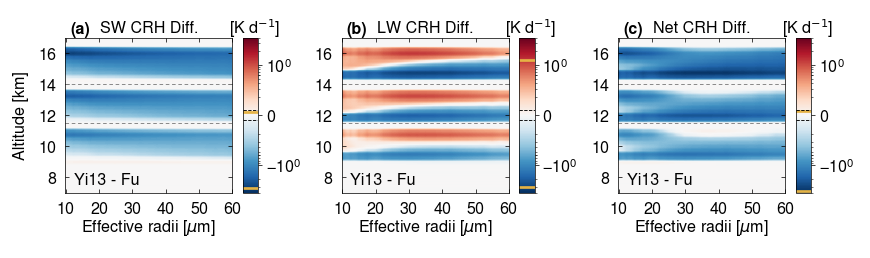

In [15]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 4 # inches
flength  = 13.5 # inches

rows    = 1
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.85, bottom = 0.25, left = 0.075, right = 0.95, 
                    hspace = .35, wspace = .325)

labelpad     = -52
cb_label_pos = 1.14
#IntSch_order = [2, 0, 1] # Baran2014 - Fu, Yi - Fu and Baran2016 - Fu

#isch = IntSch_order[opt]
coli = 0
for comp in ['sw', 'lw', 'net']:
    im = ax[coli].imshow(crh_diff_ds['crhd_' + comp][0], 
                         cmap = 'RdBu_r', aspect = 'auto',
                         norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                  vmin = vmin, vmax = vmax)) 
    cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
    cbar.ax.axhline(eval(comp + '_ranges')[0, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
    cbar.ax.axhline(eval(comp + '_ranges')[0, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
    cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
    cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
    cbar.set_label(r'[K d$^{-1}$]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
                   fontsize = fontsize, fontname = fontname)
    cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
    cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
    cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
    cbar.ax.tick_params(which = 'minor', length = 2.5)
    for tick in cbar.ax.get_yticklabels():
        tick.set_fontname(fontname)
    if comp == 'net': frame_title = comp.capitalize()
    else: frame_title = comp.upper()
    ax[coli].set_title(frame_title + ' CRH Diff.', color = 'black',
                            fontsize = fontsize, fontname = fontname,
                            y = 1)

    ax[coli].axhline((altitude_hl_pd - 11.5).abs().argmin(),
                          dashes=[4, 3], color = 'grey', linewidth = 1)
    ax[coli].axhline((altitude_hl_pd - 14).abs().argmin(),
                          dashes=[4, 3], color = 'grey', linewidth = 1)            

    coli += 1

# AXIS PARAMETERS
# Y Axis
yticks      = np.arange(0, crh_diff_ds['crhd_net'].shape[1] + 1, 8) # altitude tick labels
# height tickLabels are rounded for visualization:
yticklabels = (altitude_hl_pd.loc[yticks].round(1) - .1).astype('int').to_list()
    
# X Axis: # Logscale ticklabels are built manually:
new_re = np.arange(10, 60.1, 0.1)
xticks = np.arange(1, len(new_re), int(len(new_re)/5))
xticks = np.append(xticks, 500)
xticklabels = new_re[xticks].round(0).astype('int')

panel_letters   = ['(a)','(b)','(c)']
panel_letters_i = 0

for j in range(columns):
    ax[j].set_xlabel(r'Effective radii [$\mu$m]', 
                     fontsize = fontsize, fontname = fontname,
                     color ='black', labelpad = 0)
    ax[j].tick_params(axis = 'x', which = 'major', color = 'black',
                            size = 4, direction = 'in', top = True,
                            labelsize = fontsize, pad = 10)
    for tick in ax[j].get_xticklabels():
        tick.set_fontname(fontname)
    ax[j].set_xticks(xticks)
    ax[j].set_xticklabels(xticklabels) #[::-1]
    #ax[opt, j].set_xlim(1, 11) 

    ax[j].tick_params(axis = 'y', which = 'major', color = 'black',
                            size = 4, direction = 'in', right = True,
                            labelsize = fontsize, pad = 10)
    for tick in ax[j].get_yticklabels():
        tick.set_fontname(fontname)
    ax[j].set_yticks(yticks)
    ax[j].set_yticklabels(yticklabels)
    if j == 0:
        ax[j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                               color ='black', labelpad = 10)
    ax[j].text(0.05, 0.03, 'Yi13 - Fu',
                     ha = 'left', va = 'bottom', transform = ax[j].transAxes,
                     fontsize = fontsize, fontname = fontname, color = 'black')
    ax[j].set_ylim((altitude_hl_pd - 7).abs().argmin(), (altitude_hl_pd - 17).abs().argmin())
    # Panel letters:
    ax[j].text(0.15, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                     ha = 'right', va = 'top', transform = ax[j].transAxes,
                     fontsize = fontsize, fontname = fontname, color = 'black')
    panel_letters_i += 1

# Save Figure:
#plt.savefig('paper_figures/f06.pdf', dpi = 300)

In [35]:
-3/20

-0.15

In [36]:
-1.65/8

-0.20625

In [35]:
-3/35

-0.08571428571428572

In [36]:
-3.6/40

-0.09

## CRH interscheme RELATIVE difference:

Check the function:

In [11]:
crh_rdiff_ds = crh_rdiff(crh_diff_ds, crh_data, test)

In [12]:
crh_rdiff_ds

<xarray.Dataset>
Dimensions:    (inter_scheme: 3, level: 82, variable: 501)
Dimensions without coordinates: inter_scheme, level, variable
Data variables:
    crhrd_sw   (inter_scheme, level, variable) float64 0.0 0.0 0.0 ... 0.0 0.0
    crhrd_lw   (inter_scheme, level, variable) float64 0.0 0.0 0.0 ... 0.0 0.0
    crhrd_net  (inter_scheme, level, variable) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:        Interscheme CRH RELATIVE difference - 1D set from test4
    description:  SW, LW and Net Interscheme CRH RELATIVE difference matrices...

For SymLogNorm (Only considering Fu scheme in this case):

In [13]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_rdiff_ds, test, diff = True)

In [14]:
vmin, vmax, linthresh, linscale

(-44830.0, 44830.0, 0.1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [15]:
vmin      = -4
vmax      = 4
linthresh = .01
linscale  = .1

Max and min lines for each case:

In [16]:
datain_path = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range_3levels(datain_path, test, version, crh_rdiff_ds, diff = True)

In [17]:
sw_ranges, lw_ranges, net_ranges

(array([[-0.20490717,  0.        ],
        [-0.        , -0.        ],
        [-0.        , -0.        ]]),
 array([[ -720.53133698, 44827.09056413],
        [    0.        ,     0.        ],
        [    0.        ,     0.        ]]),
 array([[-118.72609882,   89.10097015],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]]))

<IPython.core.display.Javascript object>


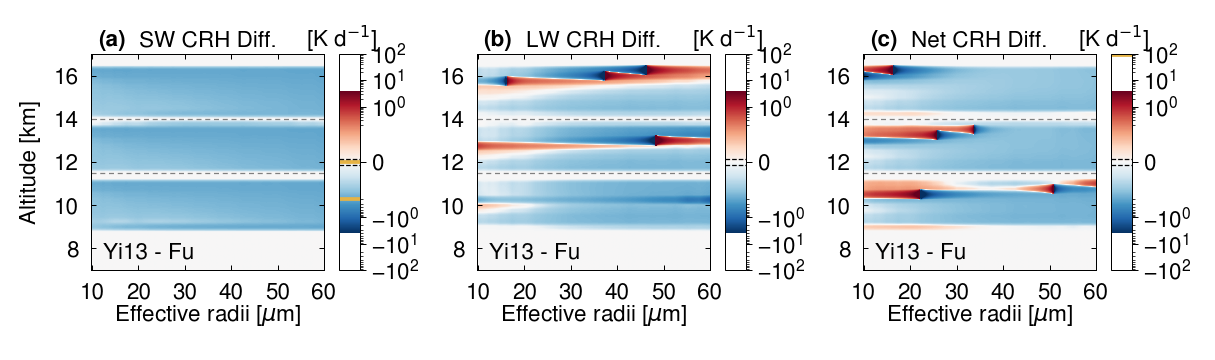

In [18]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 4 # inches
flength  = 13.5 # inches

rows    = 1
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.85, bottom = 0.25, left = 0.075, right = 0.95, 
                    hspace = .35, wspace = .325)

labelpad     = -62
cb_label_pos = 1.14
#IntSch_order = [2, 0, 1] # Baran2014 - Fu, Yi - Fu and Baran2016 - Fu

#isch = IntSch_order[opt]
coli = 0
for comp in ['sw', 'lw', 'net']:
    im = ax[coli].imshow(crh_rdiff_ds['crhrd_' + comp][0], 
                         cmap = 'RdBu_r', aspect = 'auto',
                         norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                  vmin = vmin, vmax = vmax)) 
    cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
    cbar.ax.axhline(eval(comp + '_ranges')[0, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
    cbar.ax.axhline(eval(comp + '_ranges')[0, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
    cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
    cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
    cbar.set_label(r'[K d$^{-1}$]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
                   fontsize = fontsize, fontname = fontname)
    cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
    cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
    cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
    cbar.ax.tick_params(which = 'minor', length = 2.5)
    for tick in cbar.ax.get_yticklabels():
        tick.set_fontname(fontname)
    if comp == 'net': frame_title = comp.capitalize()
    else: frame_title = comp.upper()
    ax[coli].set_title(frame_title + ' CRH Diff.', color = 'black',
                            fontsize = fontsize, fontname = fontname,
                            y = 1)

    ax[coli].axhline((altitude_hl_pd - 11.5).abs().argmin(),
                          dashes=[4, 3], color = 'grey', linewidth = 1)
    ax[coli].axhline((altitude_hl_pd - 14).abs().argmin(),
                          dashes=[4, 3], color = 'grey', linewidth = 1)            

    coli += 1

# AXIS PARAMETERS
# Y Axis
yticks      = np.arange(0, crh_diff_ds['crhd_net'].shape[1] + 1, 8) # altitude tick labels
# height tickLabels are rounded for visualization:
yticklabels = (altitude_hl_pd.loc[yticks].round(1) - .1).astype('int').to_list()
    
# X Axis: # Logscale ticklabels are built manually:
new_re = np.arange(10, 60.1, 0.1)
xticks = np.arange(1, len(new_re), int(len(new_re)/5))
xticks = np.append(xticks, 500)
xticklabels = new_re[xticks].round(0).astype('int')

panel_letters   = ['(a)','(b)','(c)']
panel_letters_i = 0

for j in range(columns):
    ax[j].set_xlabel(r'Effective radii [$\mu$m]', 
                     fontsize = fontsize, fontname = fontname,
                     color ='black', labelpad = 0)
    ax[j].tick_params(axis = 'x', which = 'major', color = 'black',
                            size = 4, direction = 'in', top = True,
                            labelsize = fontsize, pad = 10)
    for tick in ax[j].get_xticklabels():
        tick.set_fontname(fontname)
    ax[j].set_xticks(xticks)
    ax[j].set_xticklabels(xticklabels) #[::-1]
    #ax[opt, j].set_xlim(1, 11) 

    ax[j].tick_params(axis = 'y', which = 'major', color = 'black',
                            size = 4, direction = 'in', right = True,
                            labelsize = fontsize, pad = 10)
    for tick in ax[j].get_yticklabels():
        tick.set_fontname(fontname)
    ax[j].set_yticks(yticks)
    ax[j].set_yticklabels(yticklabels)
    if j == 0:
        ax[j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                               color ='black', labelpad = 10)
    ax[j].text(0.05, 0.03, 'Yi13 - Fu',
                     ha = 'left', va = 'bottom', transform = ax[j].transAxes,
                     fontsize = fontsize, fontname = fontname, color = 'black')
    ax[j].set_ylim((altitude_hl_pd - 7).abs().argmin(), (altitude_hl_pd - 17).abs().argmin())
    # Panel letters:
    ax[j].text(0.15, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                     ha = 'right', va = 'top', transform = ax[j].transAxes,
                     fontsize = fontsize, fontname = fontname, color = 'black')
    panel_letters_i += 1

# Save Figure:
#plt.savefig('paper_figures/f06.pdf', dpi = 300)